# **first model building**

## **Dependencies**

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
X=torch.arange(start=0,end=1,step=0.02)

In [ ]:
weight=0.5
bias=0.3

In [ ]:
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [ ]:
print(X.unsqueeze(dim=1))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
y=weight*X+bias

In [ ]:
print(y)

tensor([0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600, 0.3700, 0.3800,
        0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500, 0.4600, 0.4700,
        0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600,
        0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300, 0.6400, 0.6500,
        0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200, 0.7300, 0.7400,
        0.7500, 0.7600, 0.7700, 0.7800, 0.7900])


In [ ]:
X=X.unsqueeze(dim=0)
y=y.unsqueeze(dim=0)

In [ ]:
X.shape,y.shape

(torch.Size([1, 50]), torch.Size([1, 50]))

## **train test split**

In [ ]:
split_thresh=int(0.8*X.shape[1])


In [ ]:
split_thresh

40

In [ ]:
X_train=X[:,:split_thresh]
y_train=y[:,:split_thresh]

In [ ]:
X_test=X[:,split_thresh:]
y_test=y[:,split_thresh:]

In [ ]:
X_train.shape

torch.Size([1, 40])

## **Data visualization**

[]

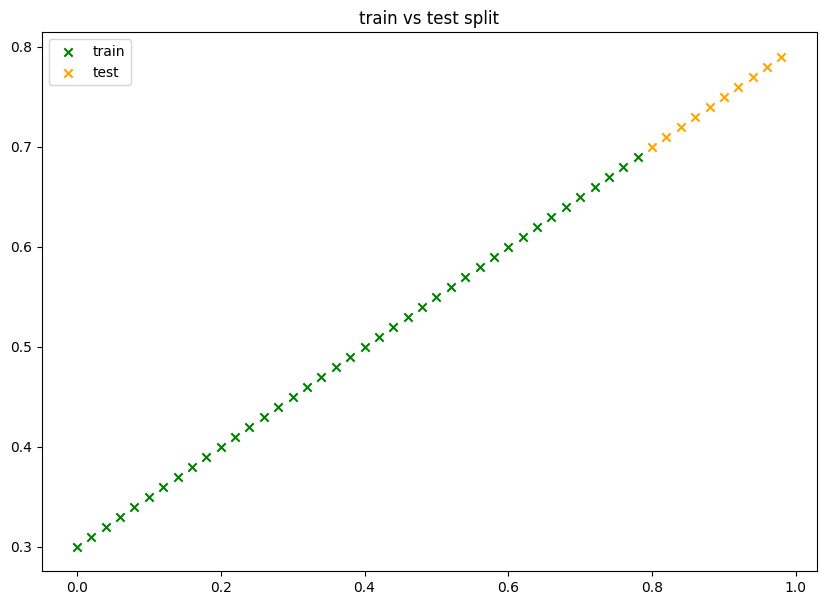

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="green",marker='x')
plt.scatter(X_test,y_test,c="orange",marker='x')
plt.title("train vs test split")
plt.legend(['train','test'])
plt.plot()

In [ ]:
X.shape[1],len(X)

(50, 1)

## **Model building**

In [ ]:
class LinearRegressionModel(nn.Module):
  # create a linear regression model class
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(len(X),requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True))
  def forwardpass(self,X:torch.Tensor)->torch.Tensor:## here i am just defining the structure of i/o (input data will be in a tensor format and also the output)
    return X*self.weight+bias
  def train_step(self,X,y,loss,optimizer,epochs):
    for epoch in range(epochs):
      torch.train()
      y_pred=self.forwardpass(X)
      loss=loss_fn(y_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    return self.weight,self.bias


In [ ]:
model=LinearRegressionModel()

In [ ]:
print(model.weight.dtype,model.bias.requires_grad)


torch.float32 True


In [ ]:
for i in dir(nn):
  if i.startswith("p") or i.startswith("P"):
    print(i)

PReLU
PairwiseDistance
Parameter
ParameterDict
ParameterList
PixelShuffle
PixelUnshuffle
PoissonNLLLoss
parallel
parameter


In [ ]:
print(dir(nn.Parameter))

['H', 'T', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__r

In [ ]:
model.forwardpass(X_train)

tensor([[0.3000, 0.3038, 0.3076, 0.3114, 0.3152, 0.3190, 0.3227, 0.3265, 0.3303,
         0.3341, 0.3379, 0.3417, 0.3455, 0.3493, 0.3531, 0.3569, 0.3606, 0.3644,
         0.3682, 0.3720, 0.3758, 0.3796, 0.3834, 0.3872, 0.3910, 0.3948, 0.3986,
         0.4023, 0.4061, 0.4099, 0.4137, 0.4175, 0.4213, 0.4251, 0.4289, 0.4327,
         0.4365, 0.4402, 0.4440, 0.4478]], grad_fn=<AddBackward0>)

In [ ]:
y_pred=model.forwardpass(X_test).detach().numpy()

[]

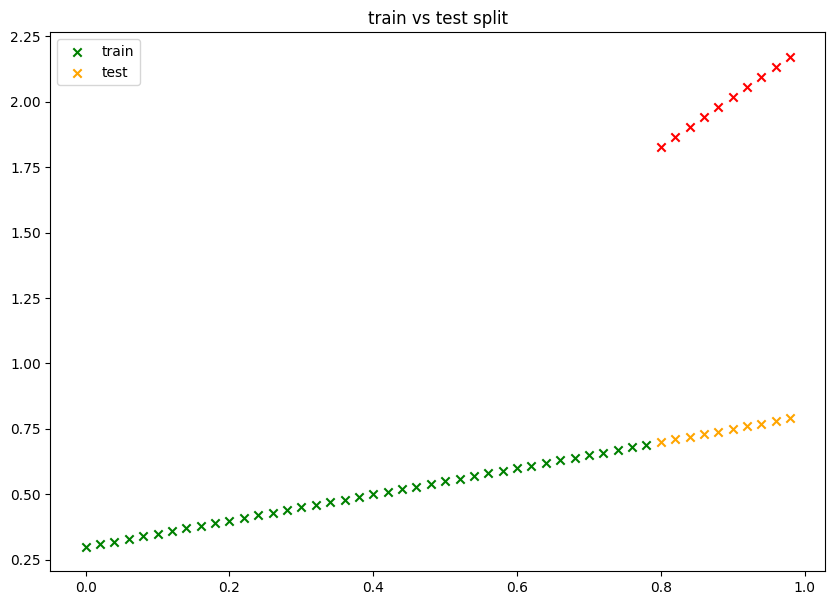

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="green",marker='x')
plt.scatter(X_test,y_test,c="orange",marker='x')
plt.scatter(X_test,y_pred,c='red',marker='x')
plt.title("train vs test split")
plt.legend(['train','test'])
plt.plot()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([1.9093], requires_grad=True),
 Parameter containing:
 tensor([1.1184], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([1.9093])), ('bias', tensor([1.1184]))])

In [ ]:
loss_fn=nn.L1Loss()

In [ ]:
loss_fn1=nn.MSELoss()

In [ ]:
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.001)

In [ ]:
epochs=2700

In [ ]:
model.weight

Parameter containing:
tensor([0.5000], requires_grad=True)

In [ ]:
## training loop
for epoch in range(epochs):
  model.train()
  y_pred=model.forwardpass(X_train)
  loss=loss_fn1(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
## testing
  model.eval()
  with torch.inference_mode():
    test_pred=model.forwardpass(X_test)
    test_loss=loss_fn1(test_pred,y_test)
  if epoch % 10==0:
    print(f"epoch:{epoch} loss:{loss} test_loss:{test_loss}")



epoch:0 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:10 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:20 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:30 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:40 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:50 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:60 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:70 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:80 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:90 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:100 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:110 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:120 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:130 loss:1.0731993418944263e-11 test_loss:4.140083761927649e-11
epoch:140 loss:1.07319934189442

In [ ]:
model.weight,model.bias

(Parameter containing:
 tensor([0.5000], requires_grad=True),
 Parameter containing:
 tensor([1.1184], requires_grad=True))

[]

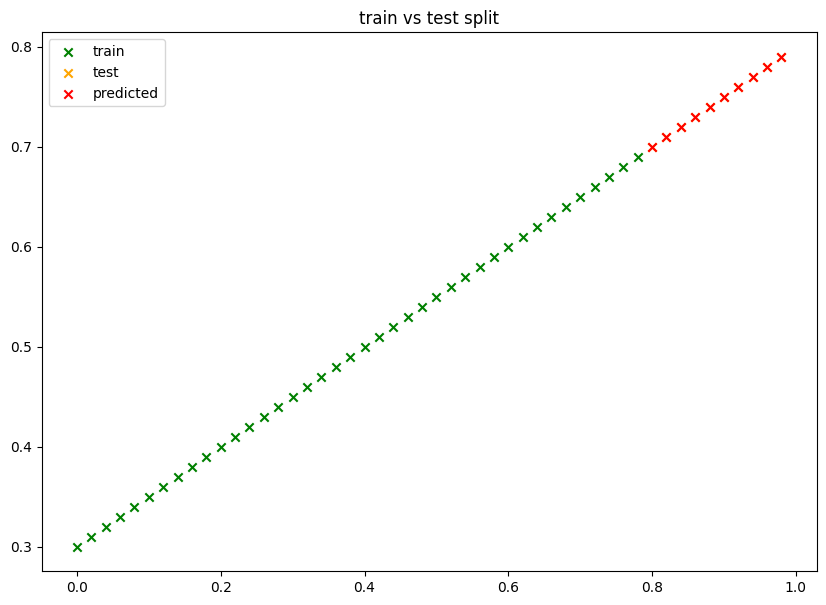

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="green",marker='x')
plt.scatter(X_test,y_test,c="orange",marker='x')
plt.scatter(X_test,model.forwardpass(X_test).detach().numpy(),c='red',marker='x')
plt.title("train vs test split")
plt.legend(['train','test','predicted'])
plt.plot()

In [ ]:
weight,bias,model.weight,model.bias

(0.5,
 0.3,
 Parameter containing:
 tensor([0.5000], requires_grad=True),
 Parameter containing:
 tensor([1.1184], requires_grad=True))